# Análisis exploratorio de datos - Baubap AI Challenge 2023 
## Por: Rafael Sánchez Cedillo, Francisco Valerio López

### Neural networks challenge

El objetivo consiste en predecir con la mayor precisión la variable objetivo. 
El primer paso entonces sería conocer cuál es la variable objetivo y cuáles son las variables que tienen mayor importancia para generar el modelo de regresión.

In [1]:
#pip install optuna

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

### Importando datos

In [3]:
datos = pd.read_pickle("nn_challenge_train.pkl")

In [4]:
datos.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.004995,0.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.521013,0.5,0.0,NaN,0.299222,0.000649,0.000000,0.827157,0.000668,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000604,0.000000,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.000700,0.833333,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1


In [5]:
datos.shape

(472422, 219)

In [15]:
datos.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
count,472422.000000,472420.000000,471254.000000,435576.000000,472422.000000,471256.000000,472422.000000,472422.000000,471256.000000,449700.000000,...,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,471255.000000,472422.000000
mean,0.518669,0.544020,0.004611,0.000691,0.312839,0.015258,0.249711,0.727841,0.001884,0.513358,...,0.080568,0.091190,0.003238,0.584832,0.040472,0.154438,0.057250,0.004895,0.653336,0.859308
std,0.108863,0.324083,0.018434,0.010233,0.112954,0.025510,0.145240,0.110845,0.006095,0.318793,...,0.089586,0.115406,0.009128,0.358869,0.043787,0.123564,0.103643,0.016048,0.475908,0.347704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445342,0.500000,0.000000,0.000000,0.227816,0.001948,0.152343,0.662139,0.000732,0.333333,...,0.023898,0.020597,0.000562,0.500000,0.024305,0.093145,0.020597,0.001184,0.000000,1.000000
50%,0.518781,0.500000,0.000000,0.000051,0.293266,0.006494,0.228571,0.747226,0.001145,0.500000,...,0.058742,0.049828,0.001687,0.727250,0.035991,0.143492,0.020597,0.002420,1.000000,1.000000
75%,0.592213,1.000000,0.000000,0.000147,0.379608,0.018182,0.326514,0.811302,0.001909,0.750000,...,0.110885,0.123073,0.003937,0.852950,0.051146,0.225993,0.037407,0.004468,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='target', ylabel='Count'>

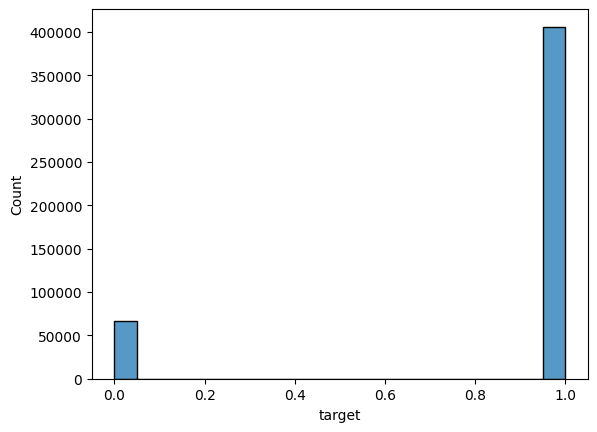

In [16]:
sns.histplot(datos.target)

In [6]:
datos.isna().sum()

feature_1          0
feature_2          2
feature_3       1168
feature_4      36846
feature_5          0
               ...  
feature_215        2
feature_216        2
feature_217        2
feature_218     1167
target             0
Length: 219, dtype: int64

<Axes: xlabel='feature_1', ylabel='Count'>

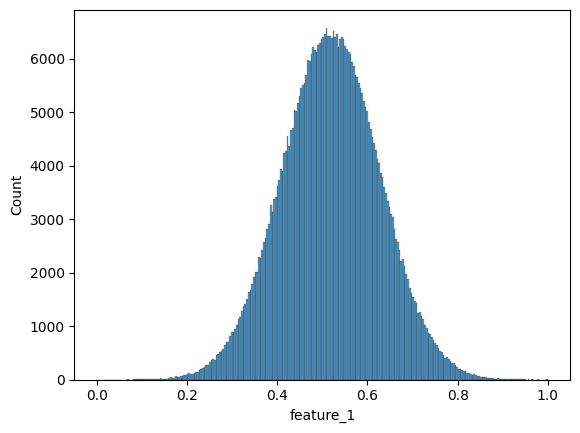

In [7]:
sns.histplot(datos.feature_1)

In [14]:
datos['target'].is_unique()

TypeError: 'bool' object is not callable

Optimizar en cada fase hasta 4 parámetros:

Phase 1: Learning
Phase 2: Complexity
Phase 3: Regularization
Phase 4: Universal

óptimización de búsqueda bayesiana